# *File name:* << **5_Uni_Fun.ipynb** >>

## Universal function approximator

<div style="border: 2px solid #535353; width: 520px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 500px; overflow: auto;">

$$
\mathbf{z} = \left( \mathbf{W}_2 \; \tanh(\mathbf{W}_1 \; \mathbf{x} + \mathbf{B}_1 ) + \mathbf{B}_2 \right)
$$


In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Synthetic data:   $(A,m,\phi,c)$

<div style="border: 2px solid #535353; width: 820px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 800px; overflow: auto;">

 $$
 y = A \; \sin(m \: x + \phi) + c
 $$

 </div>
 </div>

In [17]:
A = 0.5        # Slope
m = 1          # Intercept
phi = np.pi/3  # Phase
c = 1.0        # Vertical shift

### Data generation:

In [18]:
L = 2*np.pi      # Range of x is [0,L]
Np = 200     # Number of data points

In [19]:
x = L * np.random.rand(1,Np)
y = A * np.sin(m * x + phi) + c

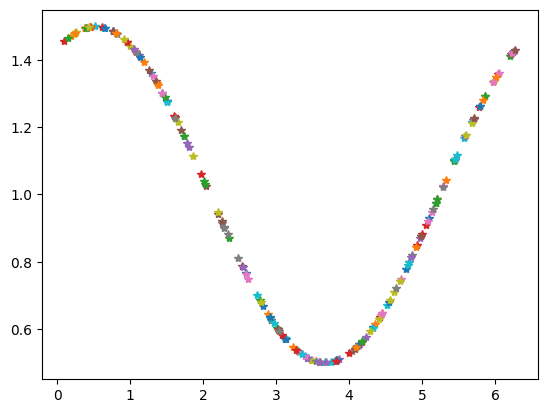

In [20]:
plt.plot(x,y,'*')
plt.show()

### Add noise to data: $ y \rightarrow y + \xi $

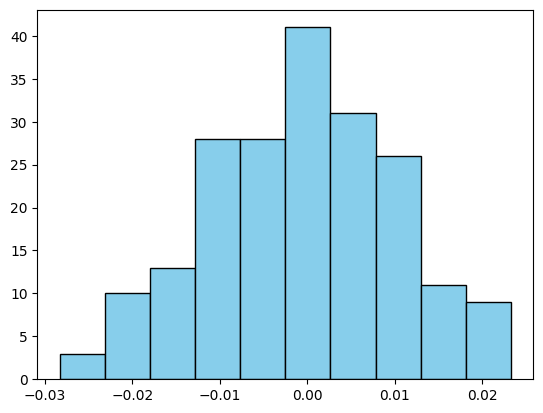

In [21]:
xi = 0.01 * np.random.randn(Np)

plt.hist(xi, bins=10, color='skyblue', edgecolor='black')
plt.show()

In [22]:
np.shape(y)

(1, 200)

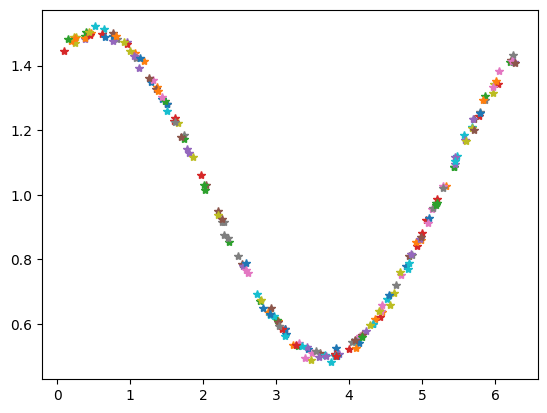

In [23]:
y = y + xi
plt.plot(x,y,'*')
plt.show()

### Loss function:

<div style="border: 2px solid #535353; width: 820px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 800px; overflow: auto;">

$$
E(\mathbf{W}_1,\mathbf{W}_2,\mathbf{B}_1,\mathbf{B}_2) = \frac{1}{N_p} \sum_{i=1}^{N_p} ||\mathbf{y}_i - ( \mathbf{W}_2 \; \tanh(\mathbf{W}_1\; \mathbf{x}_i + \mathbf{B}_1) + \mathbf{B}_2)||^2 
$$

</div>
</div>

### Gradients:

<div style="border: 2px solid #535353; width: 520px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 500px; overflow: auto;">

$ \partial E / \partial \underline{\mathbf{B}_2} = 2  \; (\underline{\mathbf{z}} - \underline{\mathbf{y}}) $

$ \partial E / \partial \underline{\underline{\mathbf{W}_2}} = \partial E / \partial \underline{\mathbf{B}_2} \;.\; \tanh( \; \underline{\underline{\mathbf{W}_1}} \; \underline{\mathbf{X}} + \underline{\mathbf{B}_1} \; )^T $

$ \partial E / \partial \underline{\mathbf{B}_1} = 2  \; sech( \; \underline{\underline{\mathbf{W}_1}} \; \underline{\mathbf{X}} + \underline{\mathbf{B}_1} \; )^2 \;\odot\;  \left[ \underline{\underline{\mathbf{W}_1}}^T \; . \; (\underline{\mathbf{O}} - \underline{\mathbf{T}}) \right] $

$ \partial E / \partial \underline{\underline{\mathbf{W}_1}} = \partial E / \partial \underline{\mathbf{B}_1} \;.\; \underline{\mathbf{X}}^T $

where $\odot$ is the element-wise product.

</div>
</div>

### Updation:

<div style="border: 2px solid #535353; width: 520px; padding: 10px; background-color: #f2f2f2; border-radius: 8px;">
<div style="background-color: white; padding: 10px; border-radius: 5px; max-width: 500px; overflow: auto;">

$\underline{\underline{\mathbf{W}_1}} \;\; \rightarrow \;\; \underline{\underline{\mathbf{W}_1}} - \eta \;\; \partial E / \partial \underline{\underline{\mathbf{W}_1}}$

$\underline{\underline{\mathbf{W}_2}} \;\; \rightarrow \;\; \underline{\underline{\mathbf{W}_2}} - \eta \;\; \partial E / \partial \underline{\underline{\mathbf{W}_2}}$

$\underline{\mathbf{B}_1} \;\; \rightarrow \;\; \underline{\mathbf{B}_1} - \eta \;\; \partial E / \partial \underline{\mathbf{B}_1}$

$\underline{\mathbf{B}_2} \;\; \rightarrow \;\; \underline{\mathbf{B}_2} - \eta \;\; \partial E / \partial \underline{\mathbf{B}_2}$

</div>
</div>

In [68]:
NumberNodes = 10

W1 = 0.5 - np.random.rand( NumberNodes , 1 )
W2 = 0.5 - np.random.rand( 1 , NumberNodes )

B1 = 0.5 - np.random.rand( NumberNodes , 1 )
B2 = 0.5 - np.random.rand( 1 , 1 )

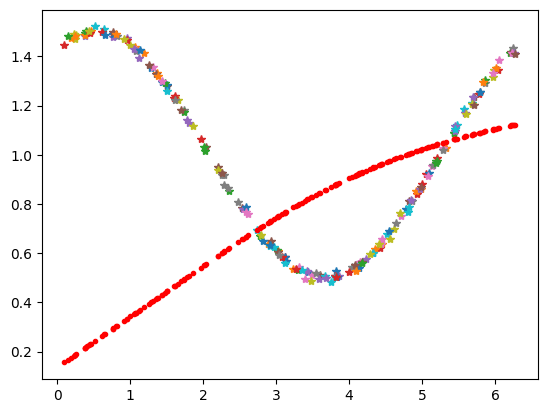

In [69]:
zz = np.tanh( W1 @ x + B1 )
z = W2 @ zz + B2

plt.plot(x,y,'*')
plt.plot(x,z,'r.')
plt.show()

In [70]:
NumberEpochs = 1000
eta = 0.001

In [71]:
xv = L * np.random.rand(1,Np)
yv = A * np.sin(m * xv + phi) + c

### Training:

In [72]:
xx = np.zeros( [1,1] )
yy = np.zeros( [1,1] )

NumberData = np.size(y)
EE = np.zeros( NumberEpochs )
EEv = np.zeros( NumberEpochs )

for Epoch in range( NumberEpochs ):

    EE[Epoch] = np.sum( ( z - y )**2 ) / NumberData
    EEv[Epoch] = np.sum( ( z - yv )**2 ) / NumberData

    for Data in range( NumberData ):
        RandomIndex = np.int64( np.floor( np.random.rand(1) * NumberData ) )

        xx[:,0] = x[:,RandomIndex]
        yy[:,0] = y[:,RandomIndex]

        zz = np.tanh( W1 @ xx + B1 )
        z = W2 @ zz + B2

        dB2 = 2 * ( z - yy )
        dB1 = 2 * (1/np.cosh( W1 @ xx + B1 ))**2 * ( W2.T @ (z-yy) )

        dW2 = dB2 @ zz.T
        dW1 = dB1 @ xx.T

        W1 = W1 - eta * dW1
        W2 = W2 - eta * dW2
        B1 = B1 - eta * dB1
        B2 = B2 - eta * dB2

## Solution:

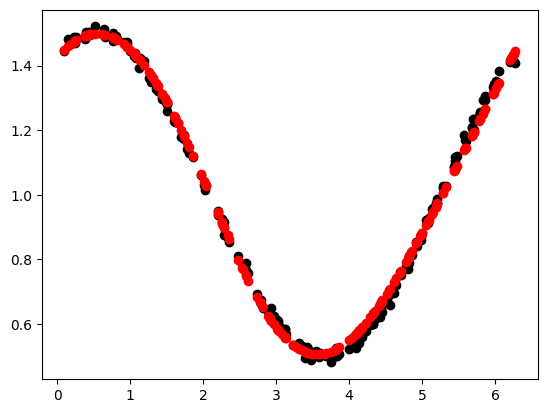

In [73]:
zz = np.tanh( W1 @ x + B1 )
z = W2 @ zz + B2

plt.plot( x , y , 'ok' )
plt.plot( x , z , 'or' )
plt.show()